(sanlc)=
# South African National Land Cover (SANLC)

## Product description

The South African National Land Cover (SANLC) product available in the SALDi Data Cube 
(SDC) has been acquired from the [Department of Forest, Fisheries and the Environment of
the Republic of South Africa](https://egis.environment.gov.za/sa_national_land_cover_datasets).

The product abbreviation used in this package is `sanlc`

You can find here a list of the classes available in the product:

![SANLC](../../_assets/sanlc_classes.png)

_Source: Thompson, M., 2021, "2020 SANLC Technical Presentation", Presentation to the 
South African National Land Cover Data Users 2020 SANLC Data Launch_


## Loading data

In [2]:
from sdc.load import load_product

nlc = load_product(product="sanlc", vec="site06")
nlc

<xarray.DataArray 'nlc' (latitude: 5500, longitude: 6500)>
dask.array<getitem, shape=(5500, 6500), dtype=uint8, chunksize=(5500, 6500), chunktype=numpy.ndarray>
Coordinates:
  * latitude     (latitude) float64 -24.9 -24.9 -24.9 ... -26.0 -26.0 -26.0
  * longitude    (longitude) float64 30.75 30.75 30.75 ... 32.05 32.05 32.05
    spatial_ref  int32 4326
    time         datetime64[ns] 2020-01-01

## Xarray Shorts: Creating and applying a boolean mask

The SANLC product can be used to create a boolean mask, which can be applied to other
datasets to extract only the pixels that are of interest. Xarray's [`isin`-method](https://docs.xarray.dev/en/stable/generated/xarray.DataArray.isin.html)
makes this very easy. Just pass the values you want to keep as a list to the method and
it will return a boolean mask.

In [4]:
classes = [3, 4]
mask = nlc.isin(classes)
mask

<xarray.DataArray 'nlc' (latitude: 5500, longitude: 6500)>
dask.array<any-aggregate, shape=(5500, 6500), dtype=bool, chunksize=(5500, 6500), chunktype=numpy.ndarray>
Coordinates:
  * latitude     (latitude) float64 -24.9 -24.9 -24.9 ... -26.0 -26.0 -26.0
  * longitude    (longitude) float64 30.75 30.75 30.75 ... 32.05 32.05 32.05
    spatial_ref  int32 4326
    time         datetime64[ns] 2020-01-01

A boolean mask is a binary array filled with 1s and 0s. The 1s indicate the pixels that
are of interest, the 0s the pixels that are not:

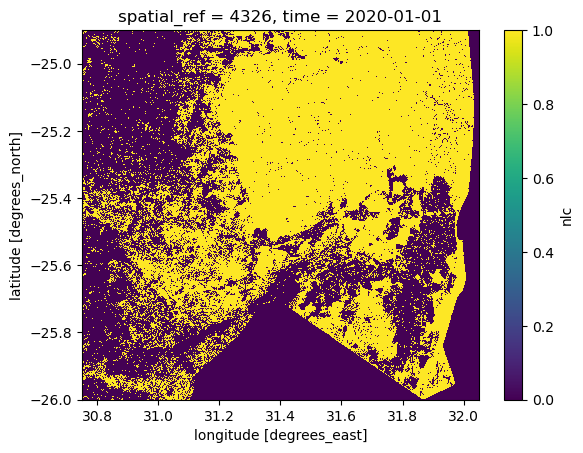

In [5]:
mask.plot()

Let's apply this mask to a Sentinel-2 dataset: 

In [3]:
s2 = load_product(product="s2_l2a", 
                  vec="site06", 
                  time_range=("2021-06-01", "2022-09-01"),
                  s2_apply_mask=True)

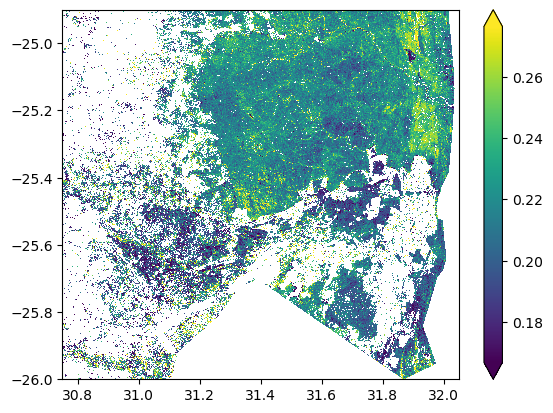

In [8]:
s2_masked = s2.where(mask)
s2_masked.B08.median(dim="time").plot(robust=True, add_labels=False)

As expected, the mask has been applied to the dataset and only the pixels that are of
interest are left. The rest has been set to `NaN`.